In [1]:
import cv2 as cv
import numpy as np
import neat
import os
import gym
import gym_snake
import pickle

from tqdm import tqdm
from matplotlib import pyplot as plt

from helpers.feature_extraction import feature_vector

# Construct Environment
env = gym.make('snake-v0')
env.grid_size = 15, 15
observation = env.reset()  # Constructs an instance of the game


In [2]:
def eval_genomes(individuals, config):
    """
    runs the game for each of the individuals
    :param config: config file from neat module
    :param individuals: list of individuals from one population
    :return: None
    """
    global env
    nets = []
    ge = []
    
    for genome_id, genome in individuals:
        genome.fitness = 0  # start with fitness level of 0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        nets.append(net)
        ge.append(genome)

    all_eaten_apples = 0
    max_eaten_apples = 0
    
    x = 0
    for net in tqdm(nets):  # Cycle for each individual
        observation = env.reset()  # Constructs an instance of the game
        game_controller = env.controller  # Controller
        grid_object = game_controller.grid  # Grid

        snakes_array = game_controller.snakes
        snake_object = snakes_array[0]
        
        fitness, eaten_apples, steps = 0, 0, 0
        
        features = feature_vector(snake_object, grid_object.grid, env.grid_size, grid_object.FOOD_COLOR)
        output = nets[x].activate(features)  # Get input from neural network
        action = np.argmax(output).item()
#         print("\n 1, act", action, end="  ")

        %matplotlib notebook
        env.render()  # Render game
        
        observation, reward, done, info = env.step(action)
        steps += 1
        if reward == 1:
            eaten_apples += 1
            ge[x].fitness += 3.5
        elif not reward:
            ge[x].fitness -= 0.25
        else:
            ge[x].fitness -= 100

        
        while not done:  #  Game cycle
            %matplotlib notebook
            env.render()
            
            features = feature_vector(snake_object, observation, env.grid_size, grid_object.FOOD_COLOR)  # Extract features
            output = nets[x].activate(features)
            action = np.argmax(output).item()

            observation, reward, done, info = env.step(action)  #  Make a move
            steps += 1
            
            if reward == 1:
                eaten_apples += 1
                ge[x].fitness += 3.5 * (eaten_apples ** .5)
            elif not reward:
                ge[x].fitness -= 0.25
            else:
                ge[x].fitness -= 10 if steps > 15 else 100
        
        all_eaten_apples += eaten_apples
        max_eaten_apples = max(max_eaten_apples, eaten_apples)
        x += 1
    
    print("Maximum apples eaten: ", max_eaten_apples)
    print("Apples eaten on average: ", all_eaten_apples / len(individuals))

In [3]:
def run(config_file):
    """
    runs the NEAT algorithm to train a neural network to play game.
    :param config_file: location of config file
    :return: None
    """
    config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    population = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    population.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    population.add_reporter(stats)
    
    checkpointer = neat.Checkpointer()
    population.add_reporter(checkpointer)

    # Run for up to 50 generations.
    winner = population.run(eval_genomes, 120)
    # show final stats
    print('\nBest genome:\n{!s}'.format(winner))



 ****** Running generation 0 ****** 



  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


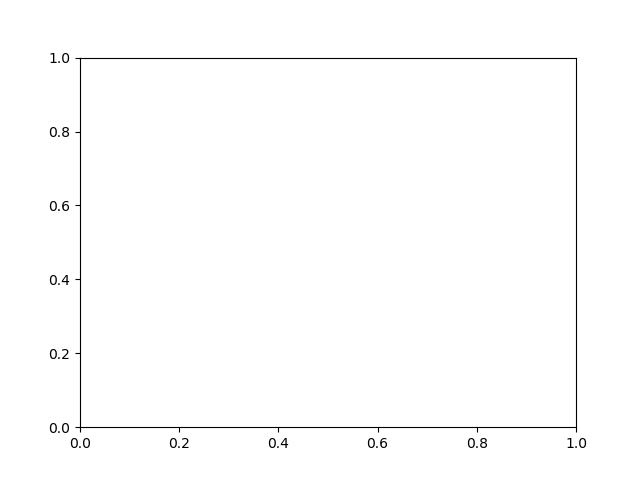

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:20<00:00,  1.62s/it]


Maximum apples eaten:  1
Apples eaten on average:  0.06
Population's average fitness: -100.50500 stdev: 12.55861
Best fitness: -12.75000 - size: (8, 60) - species 31 - id 31
Average adjusted fitness: 0.028
Mean genetic distance 3.201, standard deviation 0.425
Population of 155 members in 50 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0     3   -102.8    0.003     0
     2    0     3   -102.8    0.003     0
     3    0     3   -102.8    0.003     0
     4    0     3   -102.0    0.011     0
     5    0     3   -102.0    0.011     0
     6    0     3   -102.0    0.011     0
     7    0     3   -102.0    0.011     0
     8    0     3   -102.8    0.003     0
     9    0     3   -102.8    0.003     0
    10    0     3   -102.8    0.003     0
    11    0     3   -102.8    0.003     0
    12    0     3   -102.0    0.011     0
    13    0     3   -102.0    0.011     0
    14    0     3   -102.8    0.003     0
    15    0     3   -102.8 

100%|████████████████████████████████████████████████████████████████████████████████| 155/155 [04:25<00:00,  1.71s/it]


Maximum apples eaten:  1
Apples eaten on average:  0.03870967741935484
Population's average fitness: -96.68387 stdev: 21.62386
Best fitness: -14.00000 - size: (8, 56) - species 20 - id 76
Average adjusted fitness: 0.069
Mean genetic distance 3.200, standard deviation 0.425
Population of 150 members in 50 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1     3    -99.0    0.028     0
     2    1     3   -102.8    0.010     1
     3    1     3   -102.8    0.011     1
     4    1     3   -102.0    0.018     1
     5    1     3   -102.0    0.014     1
     6    1     3   -102.5    0.011     1
     7    1     3   -102.0    0.017     1
     8    1     3   -102.0    0.014     0
     9    1     3   -102.8    0.011     1
    10    1     3   -102.8    0.011     1
    11    1     3    -99.0    0.025     0
    12    1     3   -102.0    0.011     1
    13    1     3   -102.8    0.010     1
    14    1     3   -102.8    0.011     1
    15    1  

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [04:12<00:00,  1.68s/it]


Maximum apples eaten:  2
Apples eaten on average:  0.04666666666666667
Population's average fitness: -99.35867 stdev: 16.08834
Best fitness: -5.05025 - size: (8, 59) - species 36 - id 90
Average adjusted fitness: 0.042
Mean genetic distance 3.200, standard deviation 0.425
Population of 150 members in 50 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2     3   -102.0    0.010     1
     2    2     3   -102.8    0.008     2
     3    2     3   -102.8    0.008     2
     4    2     3   -102.0    0.013     2
     5    2     3    -98.2    0.028     0
     6    2     3   -102.2    0.009     2
     7    2     3   -102.0    0.010     2
     8    2     3   -102.0    0.010     1
     9    2     3   -102.8    0.008     2
    10    2     3   -102.8    0.008     2
    11    2     3   -102.8    0.008     1
    12    2     3   -102.0    0.010     2
    13    2     3   -102.8    0.007     2
    14    2     3   -102.8    0.008     2
    15    2   

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [04:17<00:00,  1.72s/it]


Maximum apples eaten:  1
Apples eaten on average:  0.03333333333333333
Population's average fitness: -100.01833 stdev: 14.21769
Best fitness: -14.00000 - size: (8, 60) - species 32 - id 131
Average adjusted fitness: 0.042
Mean genetic distance 3.200, standard deviation 0.425
Population of 150 members in 50 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3     3   -102.0    0.014     2
     2    3     3    -99.0    0.025     0
     3    3     3   -102.8    0.011     3
     4    3     3   -102.0    0.017     3
     5    3     3   -102.0    0.014     1
     6    3     3   -102.8    0.011     3
     7    3     3   -102.0    0.019     3
     8    3     3   -102.0    0.014     2
     9    3     3   -102.8    0.011     3
    10    3     3   -102.8    0.011     3
    11    3     3   -102.8    0.011     2
    12    3     3   -102.0    0.013     3
    13    3     3   -102.8    0.011     3
    14    3     3    -99.0    0.025     0
    15    3

 98%|██████████████████████████████████████████████████████████████████████████████▍ | 147/150 [04:20<00:04,  1.60s/it]

KeyboardInterrupt: 

In [4]:
if __name__ == '__main__':
    config_path = 'config.txt'
    run(config_path)